## Face Swap

### Steps

1. Face Alignment
2. Find Convex Hull
3. Delaunay Triangulation
4. Affine warp triangles
5. Blending of images

In [2]:
import dlib, cv2, time
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from dataPath import DATA_PATH
from dataPath import MODEL_PATH

import os, sys

sys.path.append(os.path.join(os.getcwd(), '../week1'))

import faceBlendCommon as fbc

In [3]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

In [5]:
modelPath = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(modelPath)

In [6]:
t = time.time()

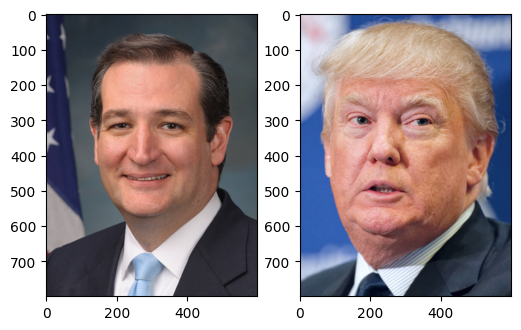

In [16]:
# Read Images
file1 = DATA_PATH + "images/ted_cruz.jpg"
file2 = DATA_PATH + "images/donald_trump.jpg"

image1 = cv2.imread(file1)
image2 = cv2.imread(file2)

img1Warped = np.copy(image2)

points1 = fbc.getLandmarks(detector, predictor, image1)
points2 = fbc.getLandmarks(detector, predictor, image2)

plt.subplot(121)
plt.imshow(image1[:,:,::-1])

plt.subplot(122)
plt.imshow(image2[:,:,::-1])


In [17]:
# Find Convex Hull

hull1 = []
hull2 = []

hullIndex = cv2.convexHull(np.array(points1), returnPoints=False)

for i in range(0, len(hullIndex)):
    hull1.append(points1[hullIndex[i][0]])
    hull2.append(points2[hullIndex[i][0]])

In [18]:
# Find delanauy triangulation for convex hull points

sizeImag2 = image2.shape
rect  = (0,0, sizeImag2[1], sizeImag2[0])

dt = fbc.calculateDelaunayTriangles(rect, hull2)

if len(dt) == 0:
    print("No delanuay triangles calculated")

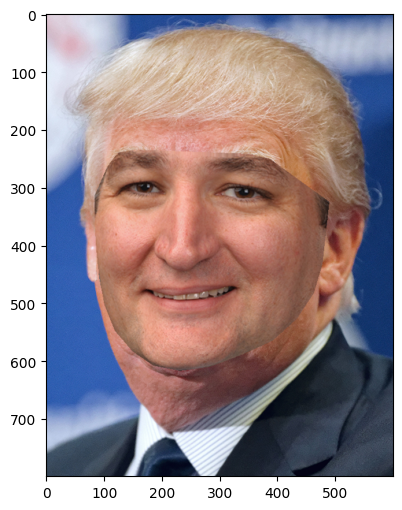

In [21]:
# Apply affine transformation to delaunay triangles

for i in range(0, len(dt)):
    t1 = []
    t2 = []

    for j in range(0,3):
        t1.append(hull1[dt[i][j]])
        t2.append(hull2[dt[i][j]])

    fbc.warpTriangle(image1,img1Warped, t1, t2)

plt.imshow(img1Warped[:,:,::-1])

In [22]:
print("Time taken for faceswap {:.3f} seconds".format(time.time()
    - t))
tClone = time.time()

Time taken for faceswap 1017.801 seconds


In [23]:
# Calculate Mask for seamless cloning

hull8U = []
for i in range(0, len(hull2)):
    hull8U.append((hull2[i][0],hull2[i][1]))

mask = np.zeros(image2.shape, dtype=image2.dtype)

cv2.fillConvexPoly(mask, np.int32(hull8U),(255,255,255))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

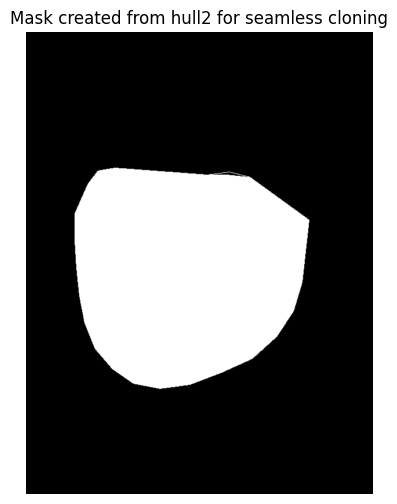

In [24]:
plt.imshow(mask)
plt.title("Mask created from hull2 for seamless cloning")
plt.axis('off')
plt.show()

In [27]:
# find center of the mask to be cloned with the destination image
r = cv2.boundingRect(np.float32([hull2]))
print(r)
center= ((r[0]+int(r[2]/2), r[1]+int(r[3]/2)))

output = cv2.seamlessClone(np.uint8(img1Warped), image2, mask, center, cv2.NORMAL_CLONE)

(84, 235, 406, 383)


In [104]:
print("Time taken for seamless cloning {:.3f} seconds".
      format(time.time() - tClone))

print("Total Time taken {:.3f} seconds ".format(time.time() - t))

Time taken for seamless cloning 0.198 seconds
Total Time taken 0.318 seconds 


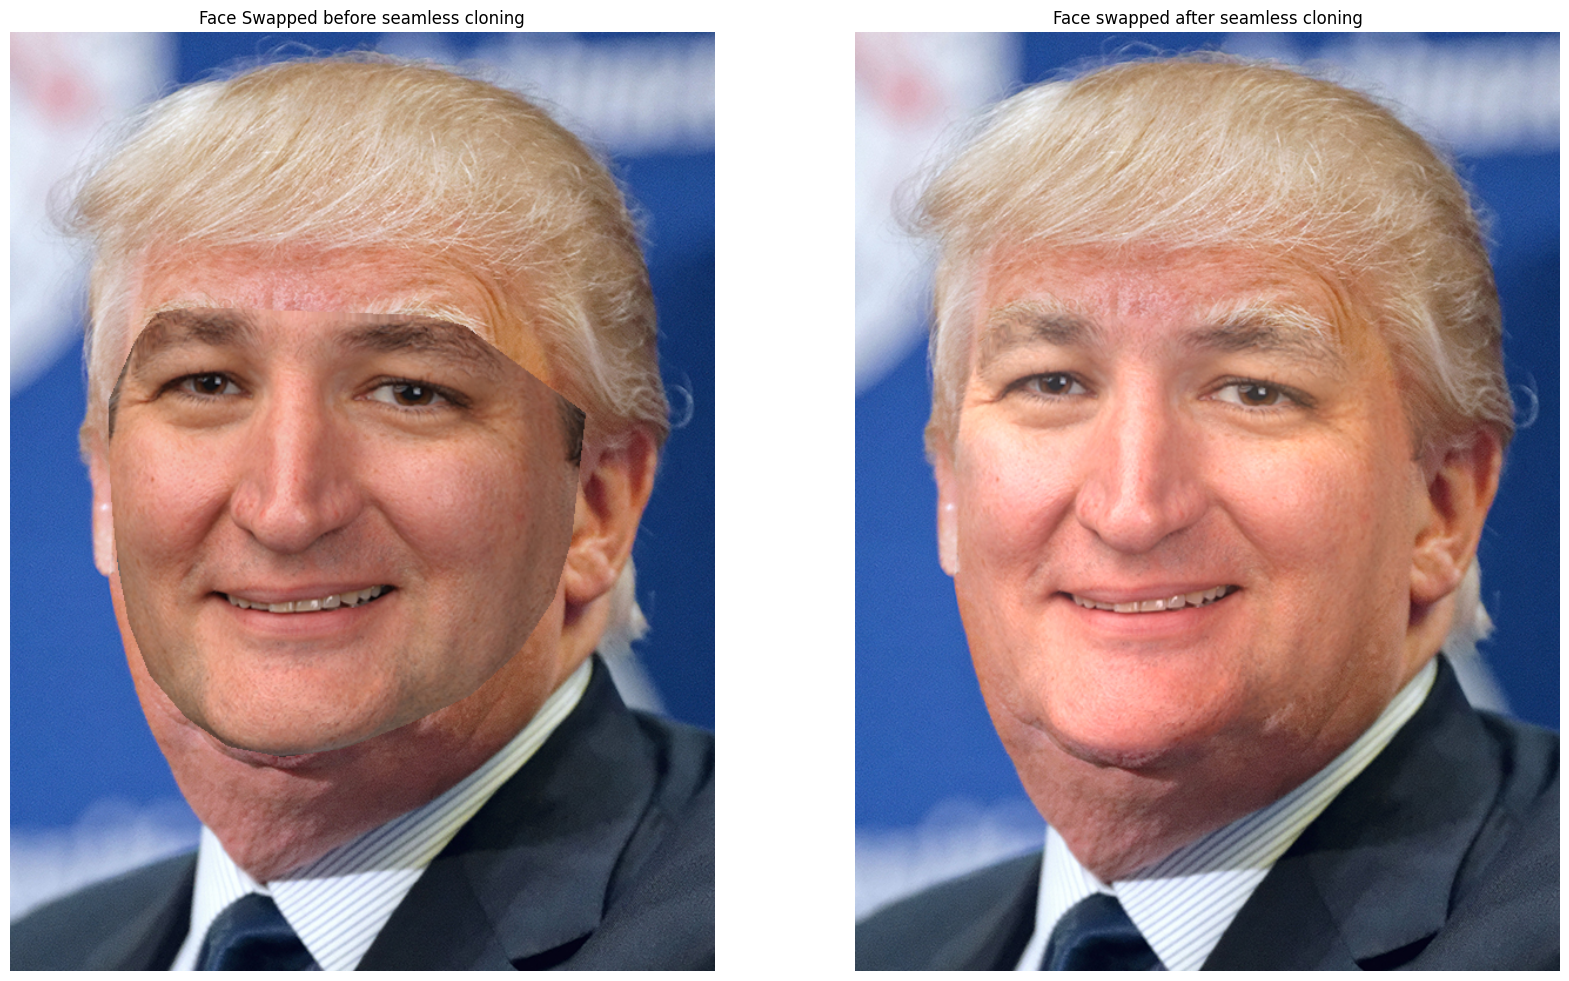

In [105]:
plt.figure(figsize=[20,20])

plt.subplot(121)
plt.imshow(np.uint8(img1Warped)[:,:,::-1])
plt.title("Face Swapped before seamless cloning")
plt.axis("off")

plt.subplot(122)
plt.imshow(output[:,:,::-1])
plt.title("Face swapped after seamless cloning")
plt.axis("off")

plt.show()

In [1]:
""" 
Face Swap

1. Get Landmarks points for both image
2. Find convexHull Index of points1
3. Read convexHull index and save in differnt array
4. Calculate delaunay Trianlges of hull array 2
5. Use hull array to create delauny traingles array
6. Apply warp triangle
7. Create mask using hull array 2 using fillConvexPoly
8. Apply seamless cloning
""" 

' \nFace Swap\n\n1. Get Landmarks points for both image\n2. Find convexHull Index of points1\n3. Read convexHull index and save in differnt array\n4. Calculate delaunay Trianlges of hull array 2\n5. Use hull array to create delauny traingles array\n6. Apply warp triangle\n7. Create mask using hull array 2 using fillConvexPoly\n8. Apply seamless cloning\n'